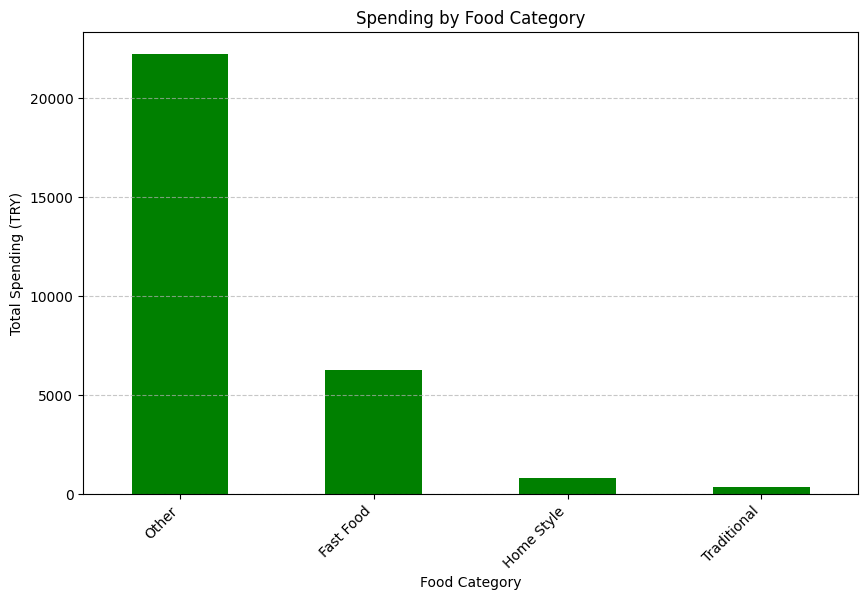

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Veriyi yükleme
data = pd.read_csv('/Users/emre/DSA PROJECT/Emre_YONTUCU_ticket.csv')

# Harcama sütununun sayısal olduğundan emin olun
data['IslemTutarı'] = data['IslemTutarı'].str.replace(',', '.').astype(float)

# Restoran isimlerine göre kategorilere ayırma
def categorize_restaurant(name):
    if 'Cafe' in name or 'Kafe' in name:
        return 'Cafe'
    elif 'Fast' in name or 'Burger' in name or 'Mc' in name:
        return 'Fast Food'
    elif 'Ev' in name or 'Yemek' in name:
        return 'Home Style'
    elif 'Pide' in name or 'Kebap' in name:
        return 'Traditional'
    else:
        return 'Other'

data['category'] = data['UyeKurulusTabelaAdı'].apply(categorize_restaurant)

# Kategorilere göre toplam harcama
category_spending = data.groupby('category')['IslemTutarı'].sum().sort_values(ascending=False)

# Grafiği görselleştirme
plt.figure(figsize=(10, 6))
category_spending.plot(kind='bar', color='green')
plt.title('Spending by Food Category')
plt.xlabel('Food Category')
plt.ylabel('Total Spending (TRY)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
